In [5]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [6]:
inp0 = pd.read_csv("application_data.csv")
inp0.head()
###Inference 1  - Data is properly alligned. No Need to remove top rows and bad columns at first look. No broken data.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
inp0.shape
#Inference 2 - The data contains 307511 rows and 122 columns

(307511, 122)

In [58]:
inp0.describe()
### Inference 3 - at first look, data looks fine. Need to look deeper into each variable in next lines

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [59]:
#inspecting empty rows and missing values
inp0.isnull().sum()
# Inference 4 -  It appears several columns have empty values

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [60]:
### Each row empty values
inp0.isnull().sum(axis=1)

0          1
1          2
2         48
3         56
4         50
          ..
307506     8
307507    10
307508     4
307509    30
307510    17
Length: 307511, dtype: int64

## Heading: Get the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and rounding it off to two decimal places

In [61]:
round(100*(inp0.isnull().sum()/len(inp0.index)), 2)
# Inference 5 -  Percentage of rows that are empty for each column

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

# Heading: Finding Missing Values

In [62]:
inp1 = inp0.isnull().sum()
inp1 = inp1[inp1.values >(0.2*len(inp0))]
inp1
##Inference 6 - Below are columns that have more than 20% of data missing

OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE           

In [63]:
inp2 = inp0.isnull().sum()
inp2 = inp2[inp2.values >(0.3*len(inp0))]
inp2
##Inference 6 - Below are columns that have more than 30% of data missing

OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE           

In [48]:
inp3 = inp0.isnull().sum()
inp3 = inp3[inp3.values > (0.4 *len(inp0))]
inp3
##Inference 6 - Below are columns that have more than 40% of data missing

OWN_CAR_AGE                     202929
EXT_SOURCE_1                    173378
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE                  208642
LANDAREA_MODE            

In [49]:
inp4 = inp0.isnull().sum()
inp4 = inp4[inp4.values >(0.5*len(inp0))]
inp4
##Inference 6 - Below are columns that have more than 50% of data missing

OWN_CAR_AGE                 202929
EXT_SOURCE_1                173378
APARTMENTS_AVG              156061
BASEMENTAREA_AVG            179943
YEARS_BUILD_AVG             204488
COMMONAREA_AVG              214865
ELEVATORS_AVG               163891
ENTRANCES_AVG               154828
FLOORSMIN_AVG               208642
LANDAREA_AVG                182590
LIVINGAPARTMENTS_AVG        210199
LIVINGAREA_AVG              154350
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAREA_AVG           169682
APARTMENTS_MODE             156061
BASEMENTAREA_MODE           179943
YEARS_BUILD_MODE            204488
COMMONAREA_MODE             214865
ELEVATORS_MODE              163891
ENTRANCES_MODE              154828
FLOORSMIN_MODE              208642
LANDAREA_MODE               182590
LIVINGAPARTMENTS_MODE       210199
LIVINGAREA_MODE             154350
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAREA_MODE          169682
APARTMENTS_MEDI             156061
BASEMENTAREA_MEDI           179943
YEARS_BUILD_MEDI    

In [59]:
inp5 = inp0.isnull().sum()
inp5 = inp5[inp5.values >(0.6*len(inp0))]
inp5
##Inference 6 - Below are columns that have more than 60% of data missing
#As the percentage increases number columns with empty values decrease

OWN_CAR_AGE                 202929
YEARS_BUILD_AVG             204488
COMMONAREA_AVG              214865
FLOORSMIN_AVG               208642
LIVINGAPARTMENTS_AVG        210199
NONLIVINGAPARTMENTS_AVG     213514
YEARS_BUILD_MODE            204488
COMMONAREA_MODE             214865
FLOORSMIN_MODE              208642
LIVINGAPARTMENTS_MODE       210199
NONLIVINGAPARTMENTS_MODE    213514
YEARS_BUILD_MEDI            204488
COMMONAREA_MEDI             214865
FLOORSMIN_MEDI              208642
LIVINGAPARTMENTS_MEDI       210199
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
dtype: int64

## Heading: Percentage of values missing in each of these columns in percentages

In [67]:
round(100*(inp0.FONDKAPREMONT_MODE.isnull().sum()/len(inp0.index)), 2)

68.39

In [68]:
round(100*(inp0.NONLIVINGAPARTMENTS_MEDI.isnull().sum()/len(inp0.index)), 2)

69.43

In [69]:
round(100*(inp0.YEARS_BUILD_AVG.isnull().sum()/len(inp0.index)), 2)

66.5

In [70]:
round(100*(inp0.COMMONAREA_AVG.isnull().sum()/len(inp0.index)), 2)

69.87

#### Comment inlight of above analysis: We now found many columns having more than 50% of values missing. Such as Common area, living apartments, own car age, FLOORSMIN_AVG which will not contribute to decision made to target variable. Also since these columns have more than half of data missing, we can remove them. They don't contribute to our analysis.

In [65]:
inp_null = len(inp0) * .50
inps = inp0.dropna(thresh=inp_null,axis=1)
inps.isnull().sum()
## Removing values greater than 50%

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 81, dtype: int64

In [102]:
inp_null = len(inp0) * .60
inps1 = inp0.dropna(thresh=inp_null,axis=1)
inps1.isnull().sum()
## Removing values greater than 60%

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 73, dtype: int64

## Alternative way of removing rows from dataframe that are having empty values greater than 40%

In [7]:
round(100*(inp0.isnull().sum()/len(inp0.index)), 2)
inpx = inp0.loc[:, (inp0.isnull().sum(axis=0)/len(inp0.index)*100) <40]
round(100*(inpx.isnull().sum()/len(inp0.index)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 73, dtype: float64

In [58]:
###Displaying inpx after removing empty rows
inpx

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
inpx

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Heading: Identifying any more missing value columns manually

In [185]:
inps.AMT_ANNUITY.isnull().sum()

12

In [ ]:
#which constitutes to 3.9% of entire rows
round(100*(inps.AMT_ANNUITY.isnull().sum()/len(inps.index)), 4)

In [137]:
inps.AMT_GOODS_PRICE.isnull().sum()

278

In [138]:
inps.NAME_TYPE_SUITE.isnull().sum()

1292

In [152]:
inps.CNT_FAM_MEMBERS.isnull().sum()

2

In [164]:
inps.EXT_SOURCE_2.isnull().sum()

660

In [165]:
inps.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [166]:
inps.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [167]:
inps.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [168]:
inps.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [169]:
inps.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [172]:
inps.FLAG_DOCUMENT_21.isnull().sum()

0

## Heading: Imputing valyes for COUNT SOCIAL CIRCLE VARIABLES , EXT_SOURCE_2, NAME_TYPE_SUITE and AMT_GOODS_PRICE.

# These values are not too large to remove. Neither they are too less to ignore. Hence, we will need to impute values to these variables based on their data type.


In [207]:
inps.DEF_60_CNT_SOCIAL_CIRCLE.describe()
#inps.EXT_SOURCE_2.describe()
inps.DEF_60_CNT_SOCIAL_CIRCLE.quantile([0.5,0.7,0.8,0.9,0.95,0.99])

0.50    0.0
0.70    0.0
0.80    0.0
0.90    0.0
0.95    1.0
0.99    2.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

### Heading: Filling DEF_60_CNT_SOCIAL_CIRCLE with mean

In [212]:
inps['DEF_60_CNT_SOCIAL_CIRCLE'] = inps['DEF_60_CNT_SOCIAL_CIRCLE'].fillna((inps['DEF_60_CNT_SOCIAL_CIRCLE'].mean()))
inps.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

### Heading: Following same for all other float/int type variables

In [217]:
#inps.EXT_SOURCE_2.isnull().sum()
inps['EXT_SOURCE_2'] = inps['EXT_SOURCE_2'].fillna(inps['EXT_SOURCE_2'].mean())
inps.EXT_SOURCE_2.isnull().sum()

0

In [218]:
inps['OBS_30_CNT_SOCIAL_CIRCLE'] = inps['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(inps['OBS_30_CNT_SOCIAL_CIRCLE'].mean())
inps.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [219]:
inps['DEF_30_CNT_SOCIAL_CIRCLE'] = inps['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(inps['DEF_30_CNT_SOCIAL_CIRCLE'].mean())
inps.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [220]:
inps['OBS_60_CNT_SOCIAL_CIRCLE'] = inps['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(inps['OBS_60_CNT_SOCIAL_CIRCLE'].mean())
inps.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [222]:
inps['DAYS_LAST_PHONE_CHANGE'] = inps['DAYS_LAST_PHONE_CHANGE'].fillna(inps['DAYS_LAST_PHONE_CHANGE'].mean())
inps.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [224]:
inps['AMT_GOODS_PRICE'] = inps['AMT_GOODS_PRICE'].fillna(inps['AMT_GOODS_PRICE'].mean())
inps.AMT_GOODS_PRICE.isnull().sum()

0

In [227]:
inps['CNT_FAM_MEMBERS'] = inps['CNT_FAM_MEMBERS'].fillna(inps['CNT_FAM_MEMBERS'].mean())
inps.CNT_FAM_MEMBERS.isnull().sum()

0

In [229]:
inps['FLAG_DOCUMENT_21'] = inps['FLAG_DOCUMENT_21'].fillna(inps['FLAG_DOCUMENT_21'].mean())
inps.FLAG_DOCUMENT_21.isnull().sum()

0

### Heading: Handling missing values for Object variable type. i.e NAME_TYPE_SUITE

In [231]:
inps.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [257]:
#inps.loc[pd.isnull(inps['NAME_TYPE_SUITE']), ['NAME_TYPE_SUITE']] = 'Unaccompanied'
inps['NAME_TYPE_SUITE'].fillna(inps['NAME_TYPE_SUITE'].mode()[0],inplace=True)
inps.NAME_TYPE_SUITE.isnull().sum()
inps.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

## Heading: IDENTIFYING OUTLIERS

## We just now have fixed missing values with Mean and Mode values. Points to remember are usually we will not always replace missing values with mean. The decision of Mean or Median is dependent on outliers. When the given column has no outliers its safe to replace using mean. In this assignment as we are asked not to replace data, I only have simulated how can empty/missing values are handled by using a new dataframe "INPS" without disturbing original dataframe.

### This is now time to identify outliers of source data manually by verifying below:

In [260]:
inp0[['TARGET','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000


#### Comment inlight of above analysis:  2 inferences / suspects from here is that , while average number of childern are 0.4, someone having 19 childern could be erroneous data or outlier. So CNT_CHILDERN is having our 1st outlier. Let's check why AMT_INCOME_TOTAL and AMT_ANNUITY having a very high value for max by taking quartiles.

In [262]:
inp0.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.8,0.9,0.95,0.99,1])

0.50       147150.0
0.70       180000.0
0.80       225000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [263]:
inp0.AMT_ANNUITY.quantile([0.5,0.7,0.8,0.9,0.95,0.99,1])

0.50     24903.0
0.70     32004.0
0.80     37516.5
0.90     45954.0
0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

#### Comment inlight of above analysis: As we see, for the variables AMT_ANNUITY, AMT_INCOME_TOTAL have the 100% percentile value way higher than 99 percentile. Values from 50% tp 99% are having steep increase which is adding meaning but not the max value. This is effecting the mean. Hence both these variables have outliers. Lets proceed our further investigation

In [266]:
inps[['AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH','REGION_RATING_CLIENT']].describe()

,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT
count,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,5.383962e+05,63815.045904,-16036.995067,-4986.120328,-2994.202373,2.052463
std,3.692794e+05,141275.766519,4363.988632,3522.886321,1509.450419,0.509034
min,4.050000e+04,-17912.000000,-25229.000000,-24672.000000,-7197.000000,1.000000
25%,2.385000e+05,-2760.000000,-19682.000000,-7479.500000,-4299.000000,2.000000
50%,4.500000e+05,-1213.000000,-15750.000000,-4504.000000,-3254.000000,2.000000
75%,6.795000e+05,-289.000000,-12413.000000,-2010.000000,-1720.000000,2.000000
max,4.050000e+06,365243.000000,-7489.000000,0.000000,0.000000,3.000000


#### Comment inlight of above analysis:Clearly, DAYS_EMPLOYED defines its a back date or days ago since the customer is employed from. This should be a negative value but it appears positive here. This would have been erroneous data or outlier.

## Treating Outlier 1 - DAYS_EMPLOYED
### There's a too high value where a person is employed for 3 lac 65 thousand days. We need not remove this row but ignore this row and continue with our analysis by taking a subset of dataframe without this record.

In [698]:
inp0['DAYS_EMPLOYED'] = inp0['DAYS_EMPLOYED'].apply(lambda x: abs(x))
inp0['DAYS_EMPLOYED'].describe()
inp0.DAYS_EMPLOYED.quantile([0.5,0.7,0.8,0.85,0.9,0.95,0.99])
inp0[inp0.DAYS_EMPLOYED < 365243].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,252137.000000,252137.000000,252137.000000,2.521370e+05,2.521370e+05,252125.000000,2.518810e+05,252137.000000,252137.000000,252137.000000,...,252137.000000,252137.000000,252137.000000,252137.000000,218281.000000,218281.000000,218281.000000,218281.000000,218281.000000,218281.000000
mean,278114.643103,0.086600,0.498515,1.759141e+05,6.113985e+05,27812.325168,5.494057e+05,0.020894,-14769.133174,2384.169325,...,0.009836,0.000710,0.000615,0.000409,0.006588,0.006977,0.034071,0.282003,0.259812,1.856277
std,102815.635309,0.281248,0.763161,2.588516e+05,4.065272e+05,14647.759104,3.732685e+05,0.013874,3662.573769,2338.360162,...,0.098687,0.026635,0.024786,0.020207,0.085093,0.111020,0.202825,0.948367,0.823679,1.826298
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-25200.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189035.000000,0.000000,0.000000,1.125000e+05,2.779695e+05,17073.000000,2.475000e+05,0.010006,-17563.000000,767.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278064.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,25834.500000,4.500000e+05,0.018850,-14573.000000,1648.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367165.000000,0.000000,1.000000,2.115000e+05,8.292240e+05,35617.500000,6.930000e+05,0.028663,-11775.000000,3175.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,17912.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,23.000000


## Treating Outlier 2 - CNT_CHILDREN 

In [749]:
inp0['CNT_CHILDREN'].describe()
inp0.CNT_CHILDREN.quantile([0.5,0.7,0.8,0.85,0.9,0.95,0.99,1])
inp0[inp0.CNT_CHILDREN < 12].describe()
## Comments - Since this is a very rare case and having 19 childern could be an 
### erroneus entry too we will ignore these outstanding clients in our analysis by removing them.
# While we take a subset of this dataframe, we will not consider clients with greater than 12 childern as their percentage
# is 8 out of 3 lacs which is minimal.

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307504.000000,307504.000000,307504.000000,3.075040e+05,3.075040e+05,307492.000000,3.072260e+05,307504.000000,307504.000000,307504.000000,...,307504.000000,307504.000000,307504.000000,307504.000000,265985.000000,265985.000000,265985.000000,265985.000000,265985.000000,265985.000000
mean,278179.671412,0.080731,0.416723,1.687981e+05,5.990271e+05,27108.550888,5.383972e+05,0.020868,-16037.025613,67725.062796,...,0.008130,0.000595,0.000507,0.000335,0.006403,0.007000,0.034363,0.267399,0.265481,1.899976
std,102790.653348,0.272421,0.718716,2.371254e+05,4.024922e+05,14493.605797,3.694481e+05,0.013831,4364.005649,139444.001802,...,0.089799,0.024388,0.022518,0.018299,0.083850,0.110759,0.204687,0.916012,0.794065,1.869309
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189142.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278199.500000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Binning INCOME TOTAL

In [713]:
inp0.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [746]:
inp0['Income']= pd.cut(inp0.AMT_INCOME_TOTAL, [0,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000], labels=["0K-200K","200-300K","300-400K","400-500K","500-600K","600-700K","700-800K","800-900K","900-1000K","1000-1100K","1100-2000K"])
inp0.Income.value_counts(normalize=True)
inp0.Income.value_counts()

0K-200K       219596
200-300K       65176
300-400K       14676
400-500K        5361
500-600K        1095
600-700K         869
800-900K         298
700-800K         162
1100-2000K        74
900-1000K         28
1000-1100K        18
Name: Income, dtype: int64

In [727]:
inp0.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [728]:
inp0.AMT_ANNUITY.quantile([0.5,0.7,0.8,0.85,0.9,0.95,0.99,1])

0.50     24903.0
0.70     32004.0
0.80     37516.5
0.85     40806.0
0.90     45954.0
0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [737]:
inp0['Annuity']= pd.cut(inp0.AMT_ANNUITY, [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,200000,280000], labels=["<100K","10-20K","20-30K","30-40K","40-50K","50-60K","60-70K","70-80K","80-90K","90-100K","100-110K","110K-200K","200K-300K"])
inp0.Annuity.value_counts(normalize=True)
inp0.Annuity.value_counts()

20-30K       92466
10-20K       83222
30-40K       58562
40-50K       28669
<100K        23283
50-60K       13165
60-70K        5051
70-80K        1558
80-90K         607
90-100K        411
110K-200K      281
100-110K       188
200K-300K       36
Name: Annuity, dtype: int64

## Treating Outlier 3 - AMT_ANNUITY 

In [751]:
inp0[inp0.AMT_ANNUITY < 200000.0].describe()
## Comments - We see that there's a huge surge value in AMT_ANNUITY value from 99 quantile to 100 quantile and this is impacting the mean, median values

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307463.000000,307463.000000,307463.000000,3.074630e+05,3.074630e+05,307463.000000,3.071850e+05,307463.000000,307463.000000,307463.000000,...,307463.000000,307463.000000,307463.000000,307463.000000,265952.000000,265952.000000,265952.000000,265952.000000,265952.000000,265952.000000
mean,278183.936516,0.080741,0.417042,1.686977e+05,5.988268e+05,27085.719656,5.381910e+05,0.020866,-16036.999867,67731.262555,...,0.008131,0.000595,0.000507,0.000332,0.006403,0.007001,0.034356,0.267375,0.265499,1.900091
std,102790.966677,0.272438,0.722069,2.367906e+05,4.020766e+05,14339.552262,3.689642e+05,0.013828,4364.038982,139449.359842,...,0.089805,0.024389,0.022519,0.018211,0.083855,0.110766,0.204674,0.915993,0.794104,1.869226
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25201.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189148.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278209.000000,0.000000,0.000000,1.462500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367145.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,197230.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [271]:
inps[['TARGET']].describe()

,TARGET
count,307511.000000
mean,0.080729
std,0.272419
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Finding the ratio of data imbalance 

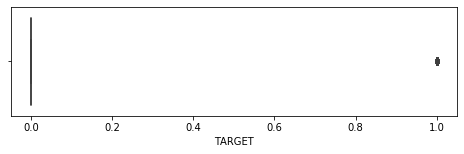

In [279]:
plt.figure(figsize=[8,2])
sns.boxplot(inp0.TARGET)
plt.show()
#most of the values are having 0 as value. 

In [277]:
inp0.TARGET.value_counts(normalize=True)
#about 92% are 0's. 8% had payment difficulties

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

## Clearly there's an imbalance in data between Client between payment difficulties and Other cases 

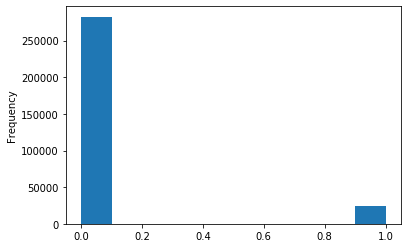

In [280]:
inp0.TARGET.plot.hist()
plt.show()

### Heading: Under sampling imbalance data

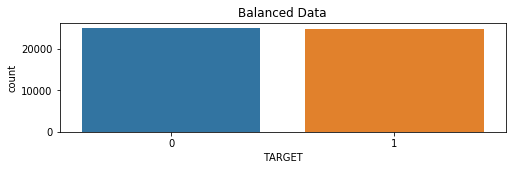

In [326]:
payment_diff = inp0.loc[inp0['TARGET'] == 1]
T0 = inp0.loc[inp0['TARGET'] == 1]
other_cases = inp0.loc[inp0['TARGET'] == 0].sample(n=25000,random_state=90000)
new_inp = pd.concat([payment_diff, other_cases])
plt.figure(figsize=(8, 2))
sns.countplot('TARGET', data=new_inp)
plt.title('Balanced Data')
plt.show()

### Heading: Displaying Other Cases Dataframe after Balancing

In [440]:
other_cases

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
152449,276696,0,Cash loans,F,N,N,0,225000.0,1256400.0,36135.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
104741,221544,0,Cash loans,M,N,Y,1,180000.0,437818.5,29389.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
191273,321774,0,Cash loans,F,Y,Y,0,90000.0,544491.0,17694.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0
60432,170065,0,Cash loans,F,N,Y,0,76500.0,101880.0,10206.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
286952,432359,0,Cash loans,F,Y,Y,0,351000.0,900000.0,43299.0,...,0,0,0,0,0.0,0.0,0.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291983,438255,0,Cash loans,F,N,N,0,112500.0,775327.5,32980.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
228266,364398,0,Cash loans,F,N,N,1,112500.0,526491.0,32337.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,9.0
134430,255923,0,Cash loans,M,Y,Y,2,211500.0,900000.0,32017.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
140879,263343,0,Cash loans,F,Y,Y,1,135000.0,150768.0,8307.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Heading: Differentiating Dataframe for both TARGET value 1 and 0

In [82]:
T1 = inp0.loc[inp0['TARGET'] == 1]
T1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [77]:
T0 = inp0.loc[inp0['TARGET'] == 0]
T0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


## Heading: NAME_CONTRACT_TYPE VS T0 and NAME_CONTRACT_TYPE vs T1

In [455]:
T1.NAME_CONTRACT_TYPE.value_counts(normalize=True)
T1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

### Comment inlight of above analysis: T1 - NAME_CONTRACT_TYPE: Among the defaulter list of clients, 93% of appllications are for Cash loans. But both Cash Loans and Revolving loans have same chances of being defaulted.

In [454]:
T0.NAME_CONTRACT_TYPE.value_counts(normalize=True)
T0.NAME_CONTRACT_TYPE.value_counts()

Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64

In [521]:
T1.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean()

NAME_CONTRACT_TYPE
Cash loans         1
Revolving loans    1
Name: TARGET, dtype: int64

In [567]:
inp0.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

## Heading: Binning Clients Age

In [123]:
inp0['DAYS_BIRTH'] = inp0['DAYS_BIRTH'].apply(lambda x: abs(x))
inp0['DAYS_BIRTH'] = inp0.DAYS_BIRTH.apply(lambda x: round(x/365, 2))
inp0['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936976
std          11.956135
min          20.520000
25%          34.010000
50%          43.150000
75%          53.920000
max          69.120000
Name: DAYS_BIRTH, dtype: float64

In [124]:
inp0['Age_Group']= pd.cut(inp0.DAYS_BIRTH, [0,30,40,50,60,70], labels=["<30","30-40","40-50","50-60","60+"])
inp0.Age_Group.value_counts(normalize=True)

30-40    0.267685
40-50    0.248856
50-60    0.221345
<30      0.146470
60+      0.115645
Name: Age_Group, dtype: float64

### Inference: About 26% of actual appliants are between age group 30 to 40. 
### Approximately 25% are in between 40-50

### Now, I want to see same distribution for T1 dataframe

In [125]:
T1['DAYS_BIRTH'] = T1['DAYS_BIRTH'].apply(lambda x: abs(x))
T1['DAYS_BIRTH'] = T1.DAYS_BIRTH.apply(lambda x: round(x/365, 2))
T1['DAYS_BIRTH'].describe()

count    24825.000000
mean        40.780352
std         11.487277
min         21.040000
25%         31.220000
50%         39.130000
75%         49.420000
max         68.950000
Name: DAYS_BIRTH, dtype: float64

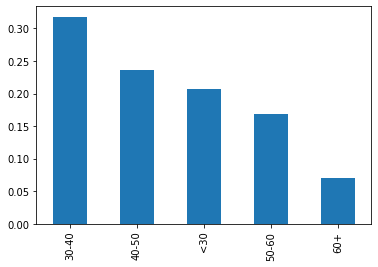

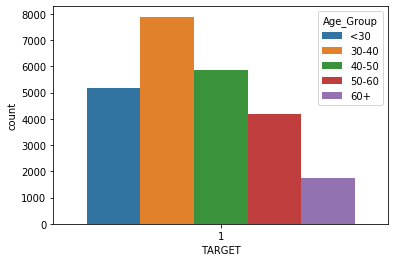

In [128]:
T1['Age_Group']= pd.cut(T1.DAYS_BIRTH, [0,30,40,50,60,70], labels=["<30","30-40","40-50","50-60","60+"])
T1.Age_Group.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="Age_Group", data=T1)

### Comments inlight of above analysis - Most defaulters in clients are in age group 30-40 followed by 40-50

## Heading: CODE_GENDER vs DEFAULTER LIST

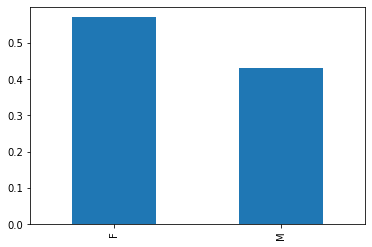

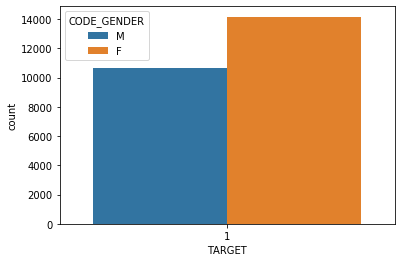

In [129]:
T1.CODE_GENDER.value_counts(normalize=True)
T1.CODE_GENDER.value_counts()
T1.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="CODE_GENDER", data=T1)

### Comments in light of above analysis - Most Default Cases are seen in Female Clients

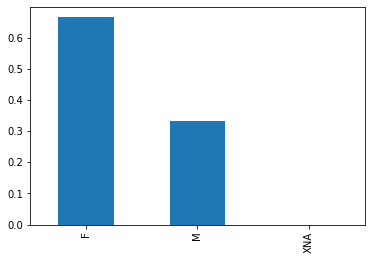

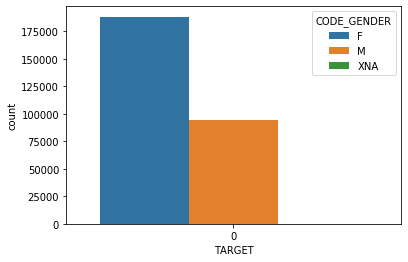

In [90]:
T0.CODE_GENDER.value_counts(normalize=True)
T0.CODE_GENDER.value_counts()
T0.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="CODE_GENDER", data=T0)

### Comment inlight of above analysis: CODE_GENDER -In defaulter dataframe, women had more difficulties in repaying loan. Even in case of loan repayment also, women are higher in number proportionate to number of applications received by them.

## Heading:  FLAG_OWN_CAR vs DEFAULTER LIST

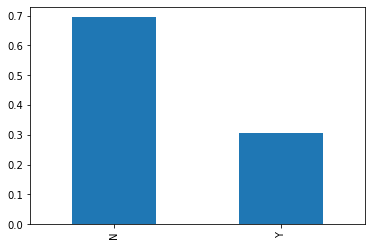

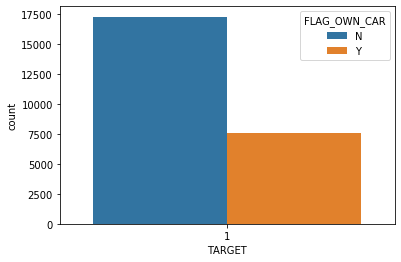

In [91]:
T1.FLAG_OWN_CAR.value_counts()
T1.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="FLAG_OWN_CAR", data=T1)

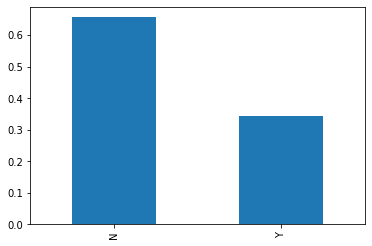

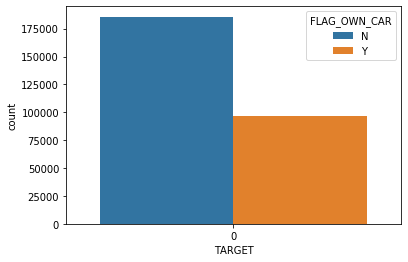

In [92]:
T0.FLAG_OWN_CAR.value_counts(normalize=True)
T0.FLAG_OWN_CAR.value_counts()
T0.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="FLAG_OWN_CAR", data=T0)

### Comment inlight of above analysis: FLAG_OWN_CAR - In defaulter dataframe, most of clients do not own a car. Among clients who are religious in paying back loans, high percentage of them don't own a car.

## Heading: FLAG_OWN_REALTY vs DEFAULTER LIST

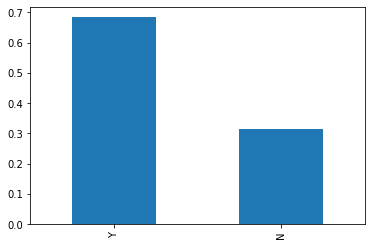

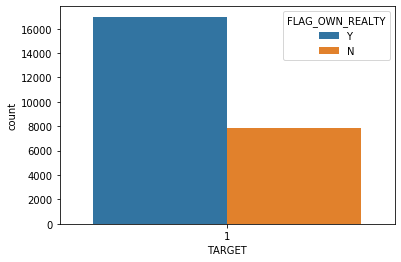

In [93]:
T1.FLAG_OWN_REALTY.value_counts(normalize=True)
T1.FLAG_OWN_REALTY.value_counts()
T1.FLAG_OWN_REALTY.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="FLAG_OWN_REALTY", data=T1)

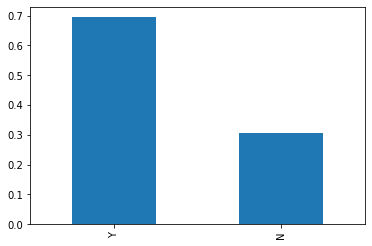

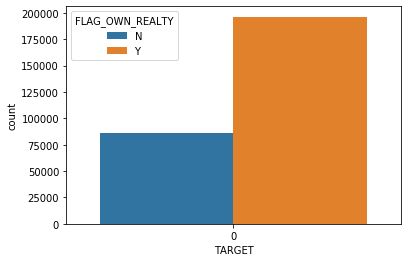

In [94]:
T0.FLAG_OWN_REALTY.value_counts(normalize=True)
T0.FLAG_OWN_REALTY.value_counts()
T0.FLAG_OWN_REALTY.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="FLAG_OWN_REALTY", data=T0)

### Comment inlight of above analysis: FLAG_OWN_REALTY - Among defaulters, predominant percentage of clients have own houses. Same case with owning a flat, clients who own flat are paying back loans relatively better than who don't

## Heading: CNT_CHILDREN vs DEFAULTER LIST

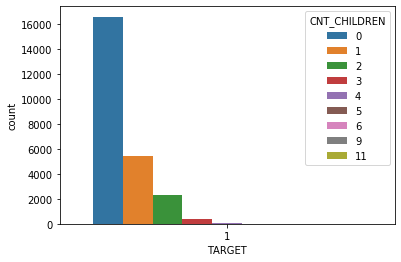

In [85]:
sns.countplot(x="TARGET", hue="CNT_CHILDREN", data=T1)

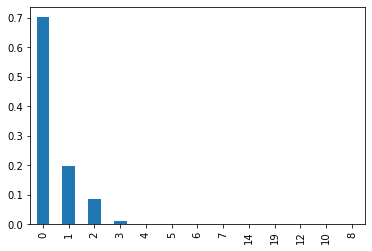

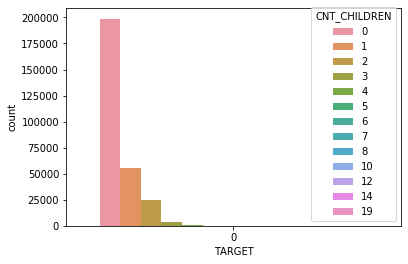

In [147]:
T0.CNT_CHILDREN.value_counts(normalize=True)
T0.CNT_CHILDREN.value_counts()
T0.CNT_CHILDREN.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="CNT_CHILDREN", data=T0)

### Comment inlight of above analysis: In CNT_CHILDERN defaulter list, most of clients have 0 children. In the other cases dataframe as well, clients with zero children had seen to be devoted to repayment of loans

## Heading: NAME_TYPE_SUITE vs TARGET 1 & TARGET 0

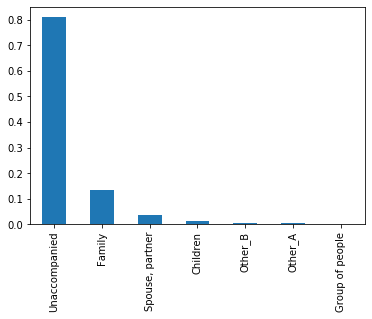

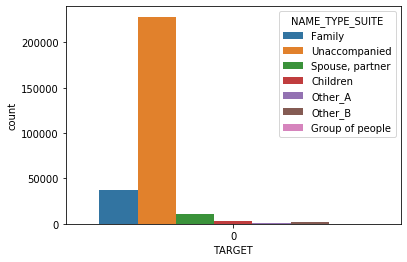

In [146]:
T0.NAME_TYPE_SUITE.value_counts(normalize=True)
T0.NAME_TYPE_SUITE.value_counts()
T0.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="NAME_TYPE_SUITE", data=T0)

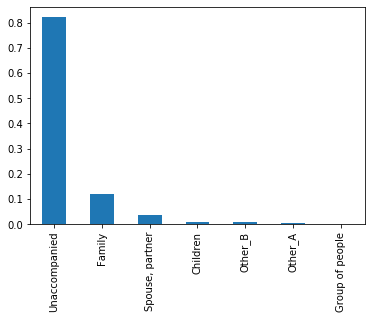

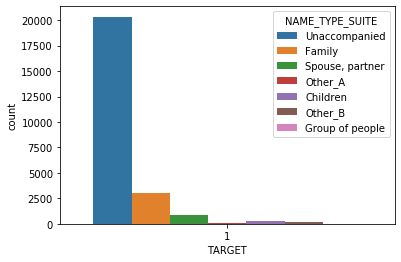

In [95]:
T1.NAME_TYPE_SUITE.value_counts(normalize=True)
T1.NAME_TYPE_SUITE.value_counts()
T1.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="NAME_TYPE_SUITE", data=T1)

### Comments in light of above analysis: It's noticed that in most of the defaulter cases, client are self accimpanied. Other cases dataframe clients are also self accompanied.

## Heading: NAME_INCOME_TYPE vs TARGET 1 AND TARGET 0

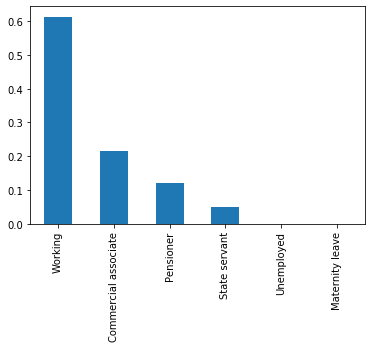

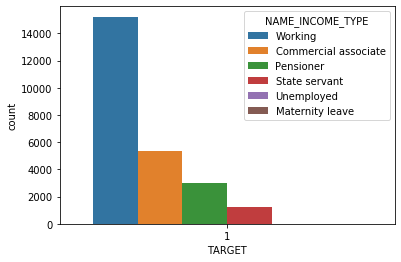

In [96]:
T1.NAME_INCOME_TYPE.value_counts(normalize=True)
T1.NAME_INCOME_TYPE.value_counts()
T1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="NAME_INCOME_TYPE", data=T1)

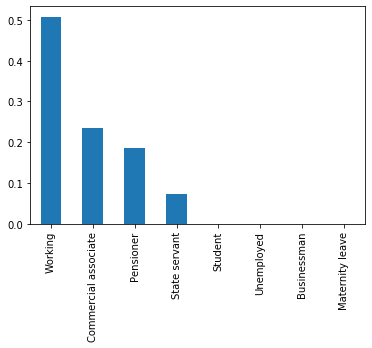

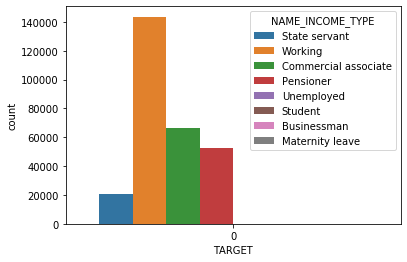

In [148]:
T0.NAME_INCOME_TYPE.value_counts(normalize=True)
T0.NAME_INCOME_TYPE.value_counts()
T0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="NAME_INCOME_TYPE", data=T0)

### COmments in light of above analysis: Many of the working income group are seen as defaulters next comes commercial associates.
#### Working class, Commercial associate and pensioners are in same order of clients who are being epitomes of religious loan repayers.

## Heading: NAME_EDUCATION_TYPE vs TARGET 1 AND TARGET 0

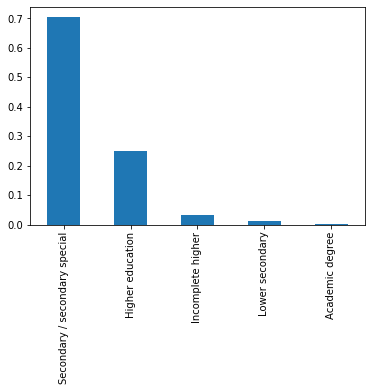

In [604]:
T0.NAME_EDUCATION_TYPE.value_counts(normalize=True)
T0.NAME_EDUCATION_TYPE.value_counts()
T0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="NAME_TYPE_SUITE", data=merge)

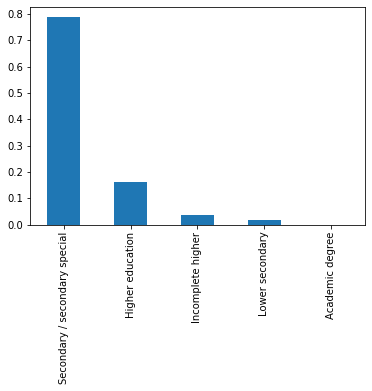

In [605]:
T1.NAME_EDUCATION_TYPE.value_counts(normalize=True)
T1.NAME_EDUCATION_TYPE.value_counts()
T1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

### Comments inlight of above analysis: Secondary/ secondary special are among most defaulters and having difficulties in repaying loans

## Heading: NAME_FAMILY_STATUS vs TARGET 1 AND TARGET 0

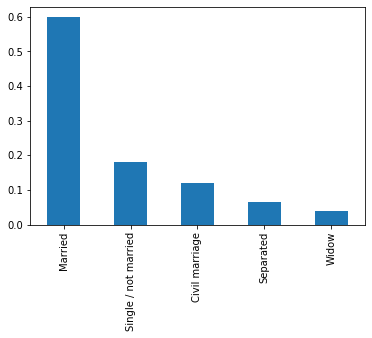

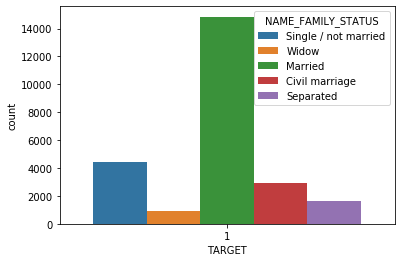

In [97]:
T1.NAME_FAMILY_STATUS.value_counts(normalize=True)
T1.NAME_FAMILY_STATUS.value_counts()
T1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="NAME_FAMILY_STATUS", data=T1)

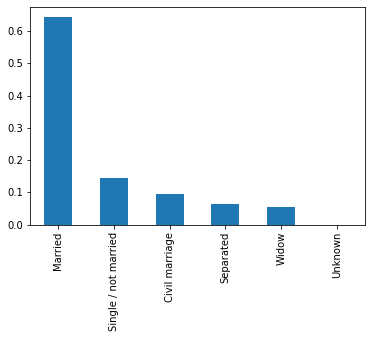

In [611]:
T0.NAME_FAMILY_STATUS.value_counts(normalize=True)
T0.NAME_FAMILY_STATUS.value_counts()
T0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.show()

### Comments inlight of above analysis:  Married clients are having difficulties in repaying loans

## Heading: NAME_HOUSING_TYPE VS TARGET 1 AND TARGET 0

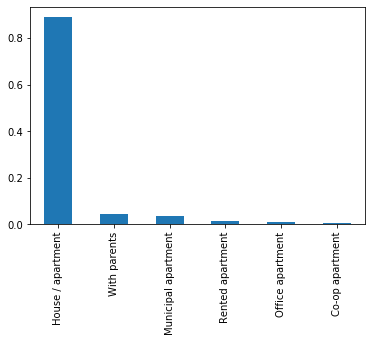

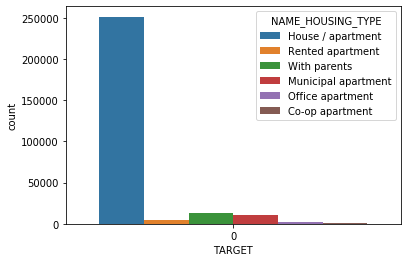

In [149]:
T0.NAME_HOUSING_TYPE.value_counts(normalize=True)
T0.NAME_HOUSING_TYPE.value_counts()
T0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="NAME_HOUSING_TYPE", data=T0)

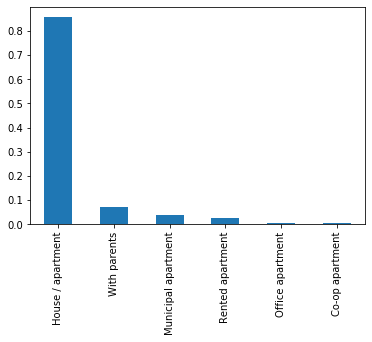

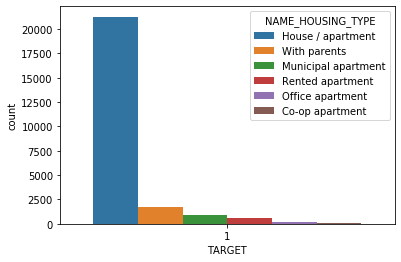

In [98]:
T1.NAME_HOUSING_TYPE.value_counts(normalize=True)
T1.NAME_HOUSING_TYPE.value_counts()
T1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="NAME_HOUSING_TYPE", data=T1)

### Comments inlight of above analysis: Most likely clients living in house / apartment are having difficulties in repaying loans. Similar strategy is seen in Other cases dataframe as well.

## Heading: Plotting univariate and bivariate analysis for entire dataframe including TARGET 0 AND 1

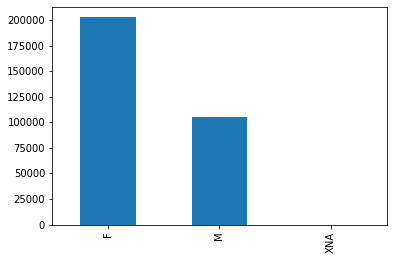

In [334]:
inp0.CODE_GENDER.value_counts().plot.bar()
plt.show()

In [336]:
inp0.CODE_GENDER.value_counts(normalize=True)
#about 65% of customers are Women and only 34% are Men

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

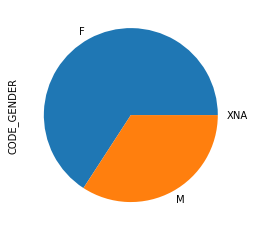

In [332]:
inp0.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.show()

### Heading: TARGET VS OTHER CATEGORICAL VALUES 

#### NAME_CONTRACT_TYPE VS TARGET

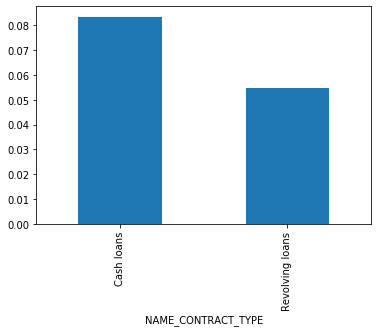

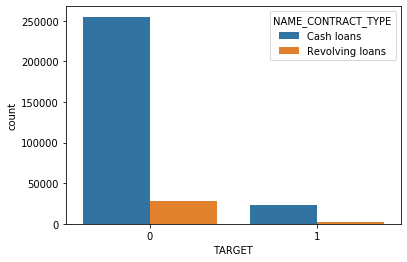

In [99]:
inp0.NAME_CONTRACT_TYPE.value_counts(normalize=True)
inp0.NAME_CONTRACT_TYPE.value_counts()
inp0.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean()
inp0.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean().plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="NAME_CONTRACT_TYPE", data=inp0)

###### Comment inlight of above analysis:: Revolving Loans are totally only 9.5% of total loan application data. Yet, when it comes to being a defaulter, 54% among the 9.5% are having payment difficulties. On the other hand, 84% of Loan Type "Cash" fall as defaulters. Cash loans are more vulnerable to repayment difficulties.

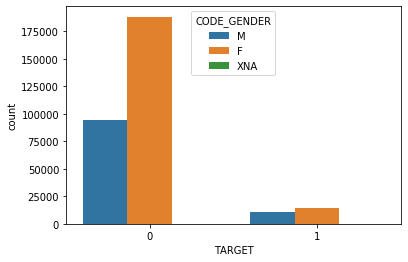

In [103]:
sns.countplot(x="TARGET", hue="CODE_GENDER", data=inp0)

###### Comment inlight of above analysis: Women clients are seen having more interest in requesting loans and proportionally having higher chances in having difficulties in repaying them too.

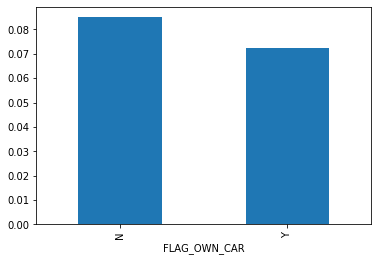

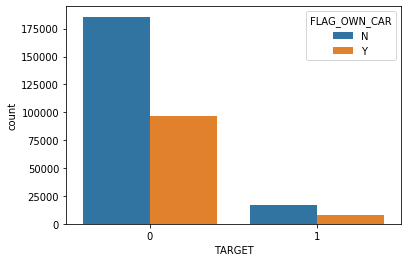

In [104]:
inp0.FLAG_OWN_CAR.value_counts(normalize=True)
inp0.groupby(['FLAG_OWN_CAR'])['TARGET'].mean().plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="FLAG_OWN_CAR", data=inp0)

###### Comment inlight of above analysis:  65% of applicants/client do not own cars. Clients who do not own cars are likely not to repay loans compared to clients who own.

In [371]:
inp0.FLAG_OWN_REALTY.value_counts(normalize=True)

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64

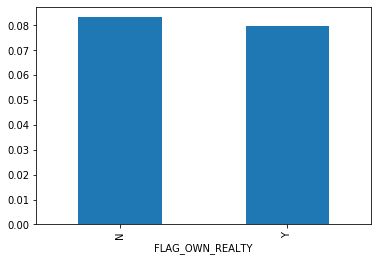

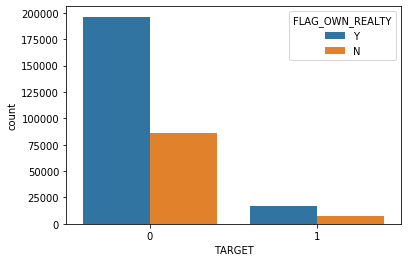

In [105]:
inp0.FLAG_OWN_REALTY.value_counts(normalize=True)
inp0.groupby(['FLAG_OWN_REALTY'])['TARGET'].mean().plot.bar()
plt.show()
sns.countplot(x="TARGET", hue="FLAG_OWN_REALTY", data=inp0)

###### Comment inlight of above analysis:Clients who own flat are nearly 60% more than clients who don't. 69% of clients own a flat and approx 31% do not own a flat. When it comes to be a defaulter or having difficulties in repaying loan, it's seen that clients who own flat are more in number compared to clients who dont own a flat.

In [375]:
inp0.CNT_CHILDREN.value_counts(normalize=True)
inp0.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

######  Comment inlight of above analysis:most(70%) of the clients who applied for loan do not have childern. Clients who applied for loan with childen progressively decreased with count of childern they have.

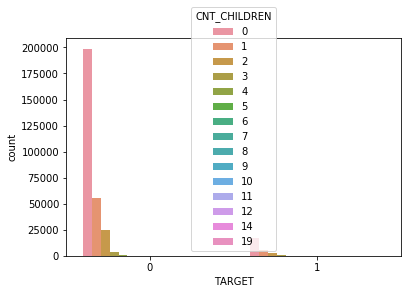

In [109]:
sns.countplot(x="TARGET", hue="CNT_CHILDREN", data=inp0)

##### Comment inlight of above analysis:It's noticed now that clients with 0 number of childern have less chances to repay loans owing to their circumstances.

##  Heading: Count of childern vs Incomes

<function matplotlib.pyplot.show(*args, **kw)>

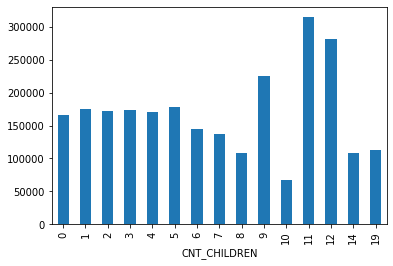

In [377]:
inp0.groupby(['CNT_CHILDREN'])['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

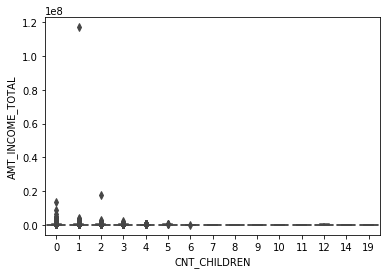

In [684]:
sns.boxplot(x=inp0.CNT_CHILDREN, y= inp0.AMT_INCOME_TOTAL)
plt.show

##### Clients with relatively more number of childern are not having too way higher income's. Especially clients with more than 12 childern and less than 9. Risk is higher with more number of childern as their incomes areen't too high to handle this in most of the cases.

### Heading: AMT_INCOME_TOTAL vs TARGET (CATEGORICAL VS NUMERICAL)

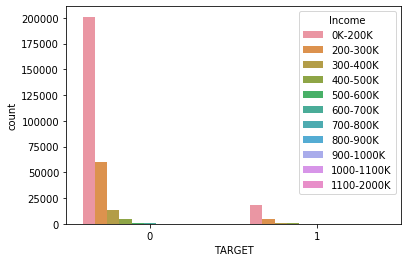

In [132]:
inp0['Income']= pd.cut(inp0.AMT_INCOME_TOTAL, [0,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000], labels=["0K-200K","200-300K","300-400K","400-500K","500-600K","600-700K","700-800K","800-900K","900-1000K","1000-1100K","1100-2000K"])
sns.countplot(x="TARGET", hue="Income", data=inp0)

##### Low income groups(below 300K) as expected are unable to repay loans on time and ending up as defaulters

## Heading: TARGET VS NAME_INCOME_TYPE

In [394]:
inp0.NAME_INCOME_TYPE.value_counts(normalize=True)
#inp0.NAME_INCOME_TYPE.value_counts()

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

##### Comment inlight of above analysis: About half of loan applicants are working professionals, one fourth of clients are commercial associates. 18% Pensioners and 7% State government employees. There are 18 students who have applied for loan too. 22 appliants are unemployed. 

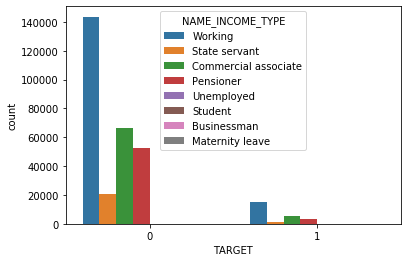

In [134]:
sns.countplot(x="TARGET", hue="NAME_INCOME_TYPE", data=inp0)

##### Comment inlight of above analysis: Among the client income types who have difficulty in repaying loans, "Working" clients are high in percentage. Following them, Commercial associates and Pensioners are seen too as defaulters with close figures in percentages. Hence working and commercial associate applicants share high risk of being defaulters.

### Heading: NAME_EDUCATION_TYPE vs TARGET

In [397]:
inp0.NAME_EDUCATION_TYPE.value_counts(normalize=True)
#inp0.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

##### Comment inlight of above analysis: About 70% of applicants have secondary special education. Nearly 25% have higher education.

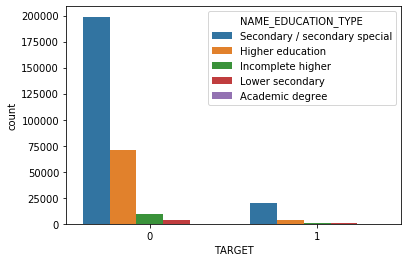

In [136]:
sns.countplot(x="TARGET", hue="NAME_EDUCATION_TYPE", data=inp0)

##### Comment inlight of above analysis: Secondary/ Secondary special education clients are our catch as they seem to have difficulties in repaying loan.

## Heading: NAME_FAMILY_STATUS vs TARGET

In [405]:
inp0.NAME_FAMILY_STATUS.value_counts(normalize=True)
#inp0.NAME_FAMILY_STATUS.value_counts()

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

#### Comment inlight of above analysis: Most of the loan applicants are Married. 63% of clients are married. 15% are single.

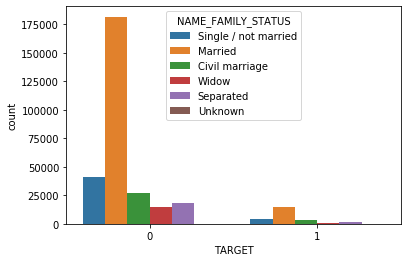

In [86]:
sns.countplot(x="TARGET", hue="NAME_FAMILY_STATUS", data=inp0)

##### Comment inlight of above analysis: Married appliants are catch among defaulters.

## Heading: NAME_HOUSING_TYPE VS TARGET

In [410]:
inp0.NAME_HOUSING_TYPE.value_counts(normalize=True)
inp0.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

### Comment inlight of above analysis: 88% of loan applications come from clients living in house/apartments. Least of them are living in Co-op apartment.

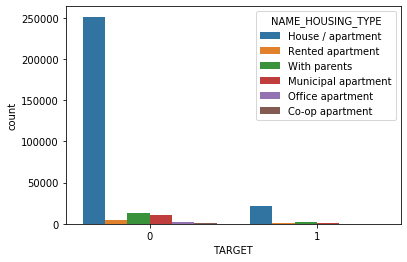

In [137]:
sns.countplot(x="TARGET", hue="NAME_HOUSING_TYPE", data=inp0)

#### Applicants living among house/ apartments and living with parents are the clients having payment difficulties.

## Heading: OCCUPATION_TYPE vs TARGET

In [416]:
inp0.OCCUPATION_TYPE.value_counts(normalize=True)
inp0.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

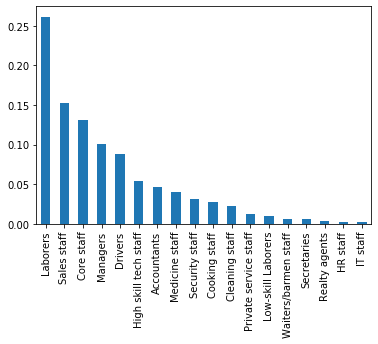

In [139]:
inp0.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

#### Comment inlight of above analysis: Highest number of loan applications have come from Occupation Type "Laborers" and least from IT Staff.
#### Sales staff and Core staff asking next highest loans, HR staff being next to last.

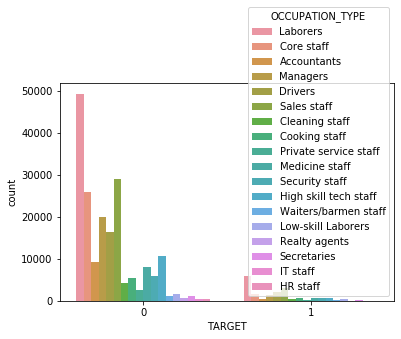

In [141]:
sns.countplot(x="TARGET", hue="OCCUPATION_TYPE", data=inp0)

## Comment inlight of above analysis: Laborers are seen to have higher diffiulty in repaying loans among clients who have been defaulted.

## Heading: CNT_FAM_MEMBERS vs TARGET

In [418]:
inp0.CNT_FAM_MEMBERS.value_counts(normalize=True)
inp0.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

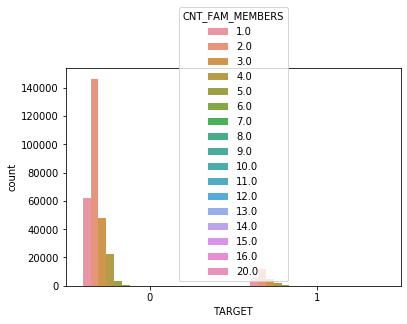

In [145]:
sns.countplot(x="TARGET", hue="CNT_FAM_MEMBERS", data=inp0)

### Comment inlight of above analysis:  Most of the applicants had 2 members in their family. 2 member family had risk in approving loans as they see difficulty in repayment

## Heading: ORGANIZATION_TYPE vs TARGET

In [425]:
inp0.ORGANIZATION_TYPE.value_counts(normalize=True)
inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

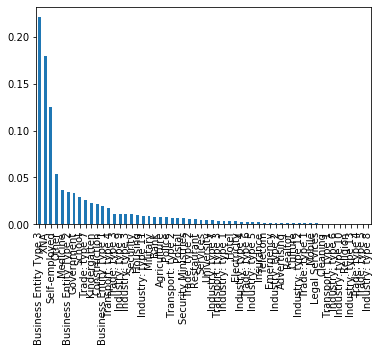

In [422]:
inp0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()

#### Comment inlight of above analysis: Highest number of applications for loan constitute from Business Entity Type 3, next from XNA, Self Employed, Other and Medicine sectors.

In [426]:
inp0.groupby(['ORGANIZATION_TYPE'])['TARGET'].mean()

ORGANIZATION_TYPE
Advertising               0.081585
Agriculture               0.104727
Bank                      0.051855
Business Entity Type 1    0.081384
Business Entity Type 2    0.085284
Business Entity Type 3    0.092996
Cleaning                  0.111538
Construction              0.116798
Culture                   0.055409
Electricity               0.066316
Emergency                 0.071429
Government                0.069781
Hotel                     0.064182
Housing                   0.079446
Industry: type 1          0.110683
Industry: type 10         0.064220
Industry: type 11         0.086538
Industry: type 12         0.037940
Industry: type 13         0.134328
Industry: type 2          0.072052
Industry: type 3          0.106162
Industry: type 4          0.101482
Industry: type 5          0.068447
Industry: type 6          0.071429
Industry: type 7          0.080337
Industry: type 8          0.125000
Industry: type 9          0.066805
Insurance                 0.056951
Ki

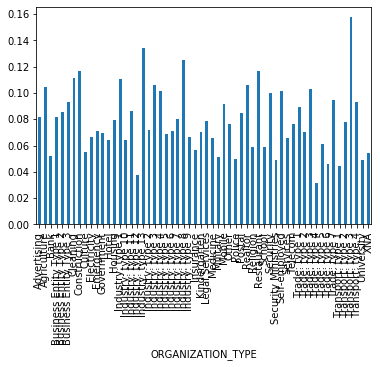

In [427]:
inp0.groupby(['ORGANIZATION_TYPE'])['TARGET'].mean().plot.bar()
plt.show()

### Comment inlight of above analysis: Now with these plots, we can understand that Transport: type 3   organization type has highest percentage of non repaying clients with 15% approximately. Next Industry: type 13  followed by Industry: type 8 and Restaurant

## Heading: NAME_TYPE_SUITE vs TARGET

In [434]:
inp0.NAME_TYPE_SUITE.value_counts(normalize=True)
#inp0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

#### Comment inlight of above analysis: Predominantly, most of the clients who have come for loan applications have come unaccompanied. They constitude to 81% while 13% of clients have come as family.

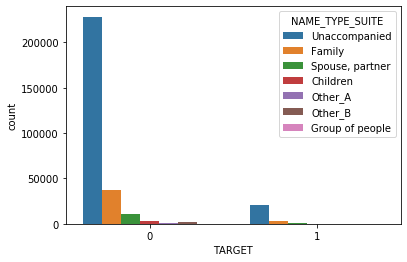

In [144]:
sns.countplot(x="TARGET", hue="NAME_TYPE_SUITE", data=inp0)

#### Comments inlight of above analysis: Unaccompanied clients are likely to be defaulters

## Is there anything to log about day when client came for loan? 
## Surprisingly most of the clients didn't walk for loan applications during weekend but rather on Tuesday.

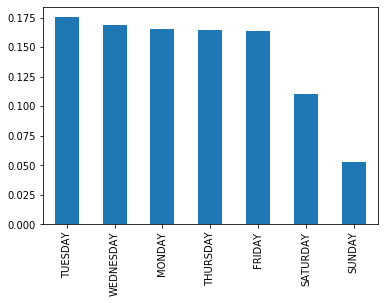

In [438]:
inp0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.show()

## Finding TOP CORELATION VARIABLES for T0 & T1 individually

In [675]:
corr_matrix = T1[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']].corr()
corr_matrix

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED
CNT_CHILDREN,1.000000,0.004796,0.885484,-0.001675,0.031257,-0.008112,-0.031975,-0.259106,-0.191942
AMT_INCOME_TOTAL,0.004796,1.000000,0.006654,0.038131,0.046421,0.037583,0.009135,-0.003097,-0.014979
CNT_FAM_MEMBERS,0.885484,0.006654,1.000000,0.051224,0.075711,0.047388,-0.030163,-0.203264,-0.186561
AMT_CREDIT,-0.001675,0.038131,0.051224,1.000000,0.752195,0.983103,0.069161,0.135316,-0.000968
AMT_ANNUITY,0.031257,0.046421,0.075711,0.752195,1.000000,0.752699,0.071690,0.014303,-0.082552
AMT_GOODS_PRICE,-0.008112,0.037583,0.047388,0.983103,0.752699,1.000000,0.076049,0.135810,0.003587
REGION_POPULATION_RELATIVE,-0.031975,0.009135,-0.030163,0.069161,0.071690,0.076049,1.000000,0.048187,0.015103
DAYS_BIRTH,-0.259106,-0.003097,-0.203264,0.135316,0.014303,0.135810,0.048187,1.000000,0.575099
DAYS_EMPLOYED,-0.191942,-0.014979,-0.186561,-0.000968,-0.082552,0.003587,0.015103,0.575099,1.000000


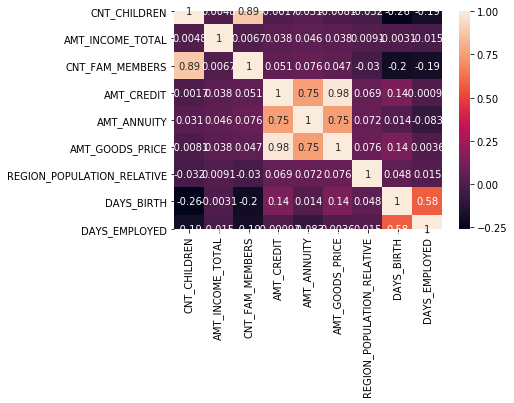

In [676]:
sns.heatmap(corr_matrix, annot = True)

In [677]:
corr_matrix.shape

(9, 9)

In [678]:
corrdf = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool)).unstack().reset_index()
corrdf.columns = ['VAR1','VAR2','Correlation']
#corrdf.dropna(subest = ['Correlation'], inplace = True)
corrdf.sort_values('Correlation', ascending = False)

,VAR1,VAR2,Correlation
48,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
18,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
49,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
39,AMT_ANNUITY,AMT_CREDIT,0.752195
79,DAYS_EMPLOYED,DAYS_BIRTH,0.575099
...,...,...,...
61,REGION_POPULATION_RELATIVE,DAYS_BIRTH,NaN
62,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,NaN
70,DAYS_BIRTH,DAYS_BIRTH,NaN
71,DAYS_BIRTH,DAYS_EMPLOYED,NaN


In [680]:
corr_matrix = T0[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']].corr()
corr_matrix

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED
CNT_CHILDREN,1.000000,0.027397,0.878571,0.003081,0.020905,-0.000525,-0.024363,0.336966,-0.243356
AMT_INCOME_TOTAL,0.027397,1.000000,0.034256,0.342799,0.418953,0.349462,0.167851,0.062609,-0.141250
CNT_FAM_MEMBERS,0.878571,0.034256,1.000000,0.064536,0.075787,0.062814,-0.023425,0.285825,-0.237413
AMT_CREDIT,0.003081,0.342799,0.064536,1.000000,0.771309,0.987250,0.100604,-0.047378,-0.072515
AMT_ANNUITY,0.020905,0.418953,0.075787,0.771309,1.000000,0.776686,0.120988,0.012263,-0.106425
AMT_GOODS_PRICE,-0.000525,0.349462,0.062814,0.987250,0.776686,1.000000,0.103827,-0.044565,-0.071051
REGION_POPULATION_RELATIVE,-0.024363,0.167851,-0.023425,0.100604,0.120988,0.103827,1.000000,-0.025244,-0.006961
DAYS_BIRTH,0.336966,0.062609,0.285825,-0.047378,0.012263,-0.044565,-0.025244,1.000000,-0.618048
DAYS_EMPLOYED,-0.243356,-0.141250,-0.237413,-0.072515,-0.106425,-0.071051,-0.006961,-0.618048,1.000000


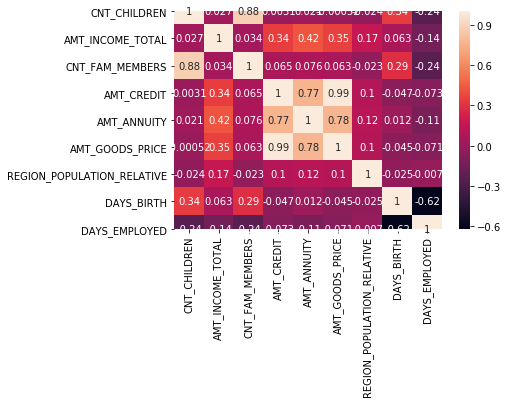

In [681]:
sns.heatmap(corr_matrix, annot = True)

In [682]:
corrdf = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool)).unstack().reset_index()
corrdf.columns = ['VAR1','VAR2','Correlation']
#corrdf.dropna(subest = ['Correlation'], inplace = True)
corrdf.sort_values('Correlation', ascending = False)

,VAR1,VAR2,Correlation
48,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
18,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
49,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
39,AMT_ANNUITY,AMT_CREDIT,0.771309
37,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
...,...,...,...
61,REGION_POPULATION_RELATIVE,DAYS_BIRTH,NaN
62,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,NaN
70,DAYS_BIRTH,DAYS_BIRTH,NaN
71,DAYS_BIRTH,DAYS_EMPLOYED,NaN


### Explanation: 
### Top Co Relation co-efficients between T1 and T0 are slightly different. 

###  T1 Co Relation variables:
###  1. AMT_GOODS_PRICE	& AMT_GOODS_PRICE	(98%)
###  2. CNT_FAM_MEMBERS	 & CNT_CHILDREN	 (88%)
###  3. AMT_GOODS_PRICE	 & AMT_ANNUITY	(75.26%)
###  4. AMT_ANNUITY	 &  AMT_CREDIT	(75.21%)
###  5. DAYS_EMPLOYED	& DAYS_BIRTH	(57%)


##  T0 Co Relation variables:
###  1. AMT_GOODS_PRICE	& AMT_CREDIT		(98%)
###  2. CNT_FAM_MEMBERS	 & CNT_CHILDREN	 (87%)
###  3. AMT_GOODS_PRICE	 & AMT_ANNUITY	(77.6%)
###  4. AMT_ANNUITY	 &  AMT_CREDIT	(77.1%)
###  5. AMT_ANNUITY		& AMT_INCOME_TOTAL		(41%)

In [8]:
pd1 = pd.read_csv("previous_application.csv")
pd1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
merge = pd.merge(inpx, pd2, on='SK_ID_CURR', how='inner')
merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [15]:
merge.NAME_CONTRACT_STATUS.value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

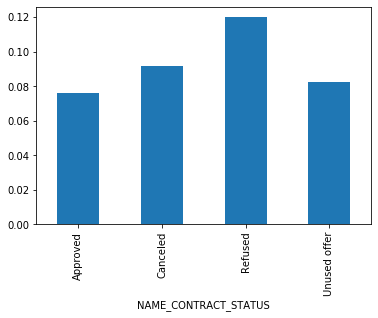

In [23]:
merge.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].mean().plot.bar()
plt.show()

## Comments inline with above observation: Applications that are refused last time are likely to be defaulted in current cycle. Hence next time, its recommended to check previous application's contract status if available

### Removing Empty columns whose percentage is more than 40% from Previous Application sheet

In [9]:
round(100*(pd1.isnull().sum()/len(pd1.index)), 2)
pd2 = pd1.loc[:, (pd1.isnull().sum(axis=0)/len(pd1.index)*100) <40]
round(100*(pd2.isnull().sum()/len(pd1.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

## Heading: Univariate analysis on NAME_CONTRACT_STATUS

In [68]:
pd1.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

#### Comments in line based on above analysis - About 62% of loans are approved in previous applicaation. 17% of them are refused.

## Heading - Converting NAME_CONTRACT_STATUS to numeric to allow us to do plot analysis as categorical to categorical.

In [28]:
def NAMECONTRACTSTATUS(x):
    if x=='Approved':
        return 1
    if x=='Canceled':
        return 2
    if x=='Refused':
        return 3
    if x=='Unused offer':
        return 4

In [32]:
merge['CONTRACT_STATUS'] = merge['NAME_CONTRACT_STATUS'].apply(NAMECONTRACTSTATUS)
merge

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,1
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,1
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,1
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle,1
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street,3
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_normal,Cash Street: low,3
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,1


In [47]:
merge.CONTRACT_STATUS.value_counts()

1    886099
2    259441
3    245390
4     22771
Name: CONTRACT_STATUS, dtype: int64

## Heading: CONTRACT_TYPE vs NAME_CONTRACT_STATUS analysis

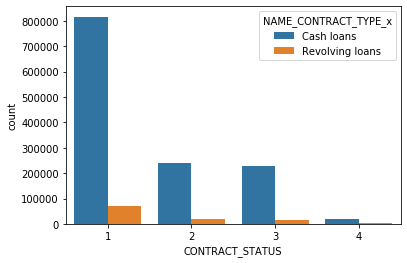

In [48]:
sns.countplot(x="CONTRACT_STATUS", hue="NAME_CONTRACT_TYPE_x", data=merge)

#### Comments in light of above analysis -Predominantly most of the loans among either 'Cash loans' or 'Revolving loans' are approved with being most of Cash loans at higher numbers compared to Revolving loans. Next high comes to "Cancelled"

## Heading - NAME_CONTRACT_STATUS vs CODE_GENDER

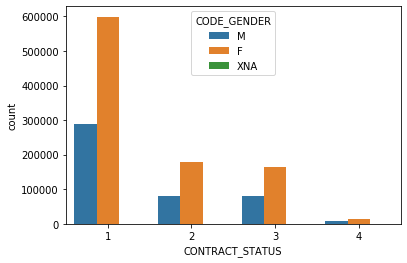

In [49]:
sns.countplot(x="CONTRACT_STATUS", hue="CODE_GENDER", data=merge)

#### Comments inlight of above analysis - Most of approved loans are granted to Female Clients, next to Male. While next highest number of loans were cancelled which are requested by Female Clients.

## Heading - FLAG_OWN_CAR vs NAME_CONTRACT_STATUS

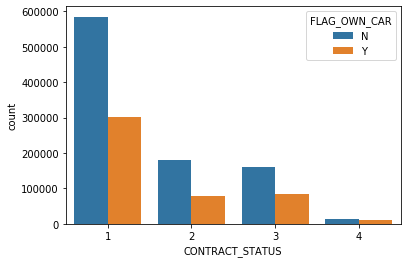

In [50]:
sns.countplot(x="CONTRACT_STATUS", hue="FLAG_OWN_CAR", data=merge)

#### Comments inlight of above analysis - Clients who don't own cars have got their previous loan applications approved rather than who have cars

## Heading-  FLAG_OWN_REALTY VS NAME_CONTRACT_STATUS

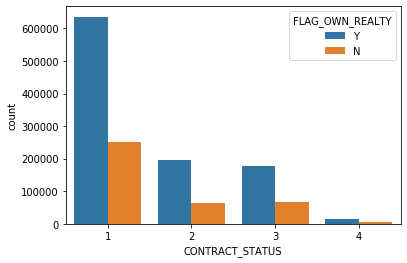

In [51]:
sns.countplot(x="CONTRACT_STATUS", hue="FLAG_OWN_REALTY", data=merge)

#### Comments inlight of above analysis - Clients who own flats got their previous loan applications approved.

## Heading-  CNT_CHILDREN VS NAME_CONTRACT_STATUS

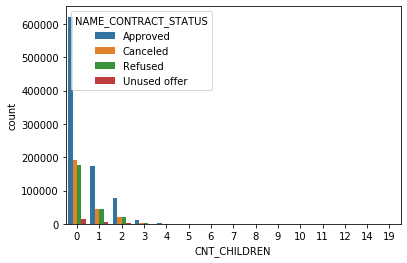

In [57]:
sns.countplot(x="CNT_CHILDREN", hue="NAME_CONTRACT_STATUS", data=merge)

#### Comment inlight of above analysis - Clients with no children had most of their previous loan applications approved.

In [60]:
merge['Income']= pd.cut(merge.AMT_INCOME_TOTAL, [0,300000,500000,700000,1000000,1100000,1200000], labels=["0K-300K","300-500K","500-700K","700-1000K","1000-1100K","1100-2000K"])
merge.Income.value_counts(normalize=True)
merge.Income.value_counts()

0K-300K       1304444
300-500K        98682
500-700K         8204
700-1000K        1671
1100-2000K        219
1000-1100K         23
Name: Income, dtype: int64

## HEADING: INCOME vs NAME_CONTRACT_STATUS

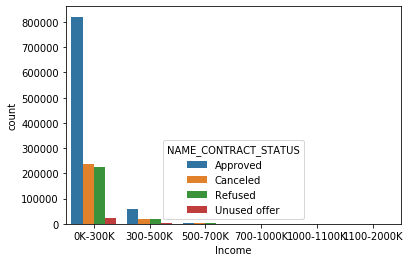

In [61]:
sns.countplot(x="Income", hue="NAME_CONTRACT_STATUS", data=merge)

#### Clients whose income is less than 300K are more likely to get their loan approved as per previous application data.

In [62]:
merge['DAYS_BIRTH'] = merge['DAYS_BIRTH'].apply(lambda x: abs(x))
merge['DAYS_BIRTH'] = merge.DAYS_BIRTH.apply(lambda x: round(x/365, 2))
merge['DAYS_BIRTH'].describe()


count    1.413701e+06
mean     4.471522e+01
std      1.190290e+01
min      2.052000e+01
25%      3.490000e+01
50%      4.396000e+01
75%      5.474000e+01
max      6.904000e+01
Name: DAYS_BIRTH, dtype: float64

In [63]:
merge['Age_Group']= pd.cut(merge.DAYS_BIRTH, [0,30,40,50,60,70], labels=["<30","30-40","40-50","50-60","60+"])
merge.Age_Group.value_counts(normalize=True)

30-40    0.262592
40-50    0.254202
50-60    0.225275
60+      0.130342
<30      0.127590
Name: Age_Group, dtype: float64

## Heading - AGE of Client VS NAME_CONTRACT_STATUS

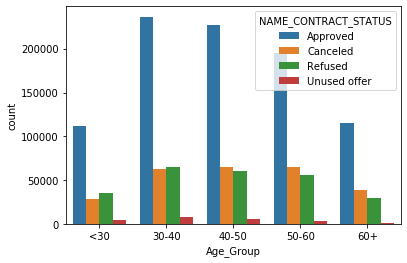

In [64]:
sns.countplot(x="Age_Group", hue="NAME_CONTRACT_STATUS", data=merge)

#### Comments inlight of above analysis - Client's whose age is between 30-40 did get their previous loan application approved

## Heading - COUNT _FAMILY_MEMBERS vs NAME_CONTRACT_STATUS

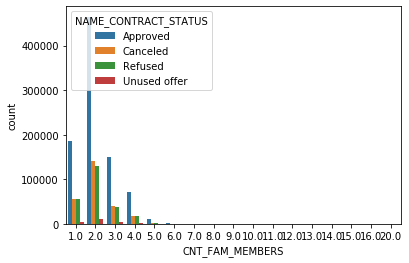

In [65]:
sns.countplot(x="CNT_FAM_MEMBERS", hue="NAME_CONTRACT_STATUS", data=merge)

#### Clients whose family members are 2 had high chances of loan approved

## ORGANIZATION_TYPE vs NAME_CONTRACT_STATUS

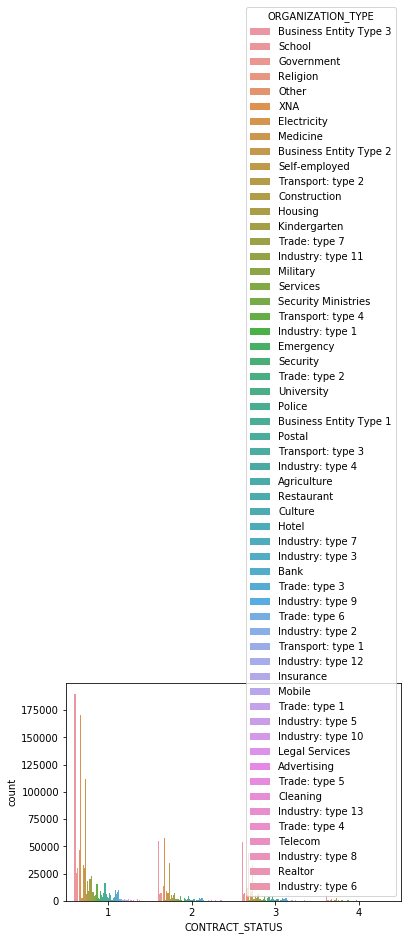

In [66]:
sns.countplot(x="CONTRACT_STATUS", hue="ORGANIZATION_TYPE", data=merge)

#### Applicants with organization type as Business Entity Type 3 had their loan applications approved previously

## Heading: OCCUPATION_TYPE vs CONTRACT_STATUS

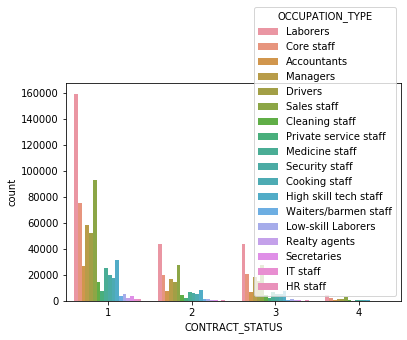

In [67]:
sns.countplot(x="CONTRACT_STATUS", hue="OCCUPATION_TYPE", data=merge)

#### Comments insight of above analysis- Clients with Occupation Type 'Laborers' had more chances of loan approved in previous application data

## Heading - NAME_HOUSING_TYPE vs CONTRACT_STATUS

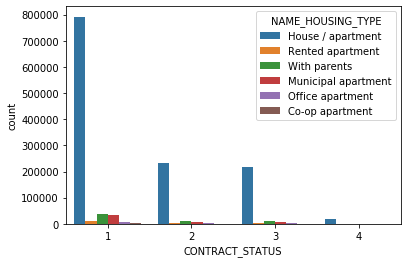

In [68]:
sns.countplot(x="CONTRACT_STATUS", hue="NAME_HOUSING_TYPE", data=merge)

#### Comments as per above graph - Clients whose housing type is House/ apartment had their loans approved previously

## NAME_EDUCATION_TYPE vs CONTRACT_STATUS

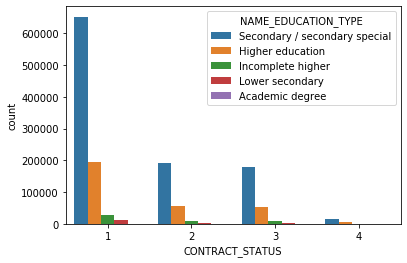

In [69]:
sns.countplot(x="CONTRACT_STATUS", hue="NAME_EDUCATION_TYPE", data=merge)

#### Comments as per above graph - Clients whose Education type is Secondary/ Secondary special had their loans approved previously

## Heading: NAME_FAMILY_STATUS vs CONTRACT_STATUS

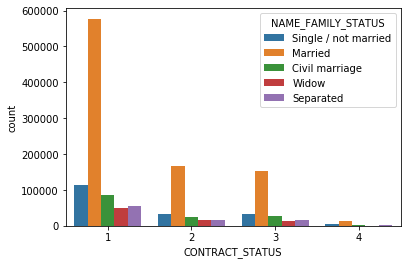

In [70]:
sns.countplot(x="CONTRACT_STATUS", hue="NAME_FAMILY_STATUS", data=merge)

#### Married clients had their loans approved previously

## Heading NAME_INCOME_TYPE vs NAME_CONTRACT_STATUS

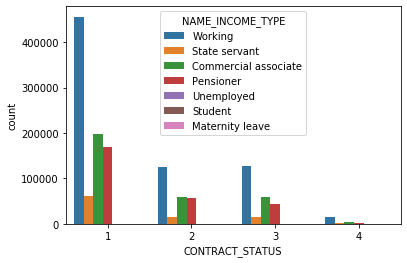

In [71]:
sns.countplot(x="CONTRACT_STATUS", hue="NAME_INCOME_TYPE", data=merge)

#### Comments inlight of above analysis - Working clients had their previous loan applicaation approved

## NAME_TYPE_SUITE vs CONTRACT_STATUS

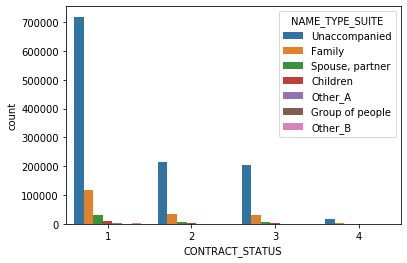

In [72]:
sns.countplot(x="CONTRACT_STATUS", hue="NAME_TYPE_SUITE", data=merge)

#### Clients whose application is approved previously are  self accompanied

##  HEADING -  NAME_PRODUCT_TYPE vs CONTRACT_STATUS

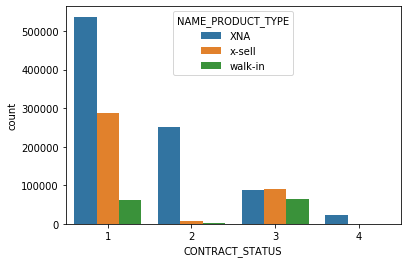

In [73]:
sns.countplot(x="CONTRACT_STATUS", hue="NAME_PRODUCT_TYPE", data=merge)

#### Comments insight of above analysis - Client's whose product type is XNA had their loans approved in previous application